#  Covid19 data anaylsis and visualization


## Introduction
#### COVID-19 is a virus infection caused by the SARS-CoV-2 coronavirus. The infection was first discovered in Wuhan city of People's republic of China in December 2019. developed into an epidemic in Jan,2020 and then declared as global pendemic by WHO in March 2020. More than 5.6M cases including 348K+ deaths are recorded by date. This notebook is to demonstrate the spread of the disease globaly and to analyze the cumulative data of confirmed, deaths, and recovered cases over time.

### SOURCES: 
* [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
* [Microsoft COVID-19 Tracker](https://www.bing.com/covid)
* [COVID-19 Tracker by Johns Hopkins University](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
* [Worldometers].<br>
(https://www.worldometers.info/coronavirus/)


### Datasource 
https://github.com/CSSEGISandData/COVID-19 <br>
2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE(Updated on daily bases)
Dataset consists of time-series data from 22 JAN 2020 Till 18 April 2020 (Updated on daily Basis).<br>
**Three Time-series dataset (Depricated):**
* time_series_19-covid-Confirmed.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv))
* time_series_19-covid-Deaths.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv))
* time_series_19-covid-Recovered.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv))

**New Time-series dataset:**
* time_series_covid19_confirmed_global.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv))
* time_series_covid19_deaths_global ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv))



## Prerequisite
**Install:**
* pip install folium (Library for Map)
* pip install cufflinks (This library binds the power of plotly with the flexibility of pandas for easy plotting)
* pip install calmap (Plot Pandas time series data sampled by day in a heatmap per calendar year)
* conda install -c conda-forge pycairo (For tree maping of the data)
* pip install fbprophet (For modeling and forcasting a time series data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import calmap

from matplotlib import style
style.use('ggplot')
import plotly 
import plotly.graph_objects as go


import cufflinks as cf
from plotly.offline import init_notebook_mode, plot,iplot
import folium
import plotly.offline as pyo
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pyo,init_notebook_mode(connected=True)
cf.go_offline()

### Loading and reading datasets

**Note:** 
For my convenience, I have used my laptop path to read three data files(comfirmed cses, deaths and recoveries).You can read them directly from John hopkins website by importing request package. 

In [49]:
# retrieving datafile and data handling
df_confirmed =  pd.read_csv(r'C:\Users\alias\Desktop\covid 19 analzsis\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv',parse_dates=True)
df_deaths    =  pd.read_csv(r'C:\Users\alias\Desktop\covid 19 analzsis\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv',parse_dates=True)
df_recovered =  pd.read_csv(r'C:\Users\alias\Desktop\covid 19 analzsis\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv',parse_dates=True)
###########################################################################################

df_recovered1 = df_recovered.fillna(0)
df_recovered1 = df_recovered1.groupby(["Country/Region"]).sum().reset_index().drop(df_recovered1.columns[2:-1], axis=1, inplace=False).sort_values('4/18/20', ascending= False).rename(columns={"4/18/20":"total_recovered"})
# #df_recovered1
# ###########################################################################################

df_deaths1 = df_deaths.fillna(0)
df_deaths1 = df_deaths1.groupby(["Country/Region"]).sum().reset_index().drop(df_deaths1.columns[2:-1], axis=1, inplace=False).sort_values('4/18/20', ascending= False).rename(columns={"4/18/20":"total_deaths"})
df_deaths
# ###########################################################################################

df_confirmed1 = df_confirmed.fillna(0)
df_confirmed1 = df_confirmed1.groupby(["Country/Region"]).sum().reset_index().drop(df_confirmed1.columns[2:-1], axis=1, inplace=False).sort_values('4/18/2020', ascending= False).rename(columns={"4/18/2020":"total_confirmed"})
df_confirmed
###########################################################################################

Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  \
0            0          0          0          0          0          0  ...   
1            0          0          0          0          0          0  ...   
2            0          0          0          0          0          0  ...   
3            0          0          0          0          0          0  ...   
4            0          0          0          0          0          0  ...   
..         ...        ...        ...        ...        ...        ...  ...   
259          0          0          0          0          0          0  ...   
260          0          0          0          0          0          0  ...   
261          0          0          0          0          0          0  ...   
262          0          0          0          0          0          0  ...   
263          0          0          0          0          0          0  ...   

     4/9/2020  4/10/2020  4/11/2020  4/12/2020  4/13/2020  4/14/2020  \
0         484        521        555        607        665        714   
1         409        416        433        446        467        475   
2        1666       1761       1825       1914       1983       2070   
3         583        601        601        638        646        659   
4          19         19         19         19         19         19   
..        ...        ...        ...        ...        ...        ...   
259         1          1          1          1          1          1   
260         3          4          4          4          4          4   
261         4          4          4          6          6          6   
262         4          4          4          4          4          4   
263         0          1          1          1          1          1   

     4/15/2020  4/16/2020  4/17/2020  4/18/2020  
0          784        840        906        933  
1          494        518        539        548  
2         2160       2268       2418       2534  
3          673        673        696        704  
4           19         19         19         24  
..         ...        ...        ...        ...  
259          1          1          1          1  
260          4          4          4          4  
261          6          6          6          6  
262          4          4          4          4  
263          1          1          1          1  

[264 rows x 92 columns]

### Merging the data files into one dataframe

In [50]:
covid19 = pd.merge(df_confirmed1, df_deaths1 ,on='Country/Region')
covid19 = pd.merge(covid19, df_recovered1 ,on='Country/Region')
covid19["active_cases"] = covid19["total_confirmed"] - covid19["total_deaths"] -covid19["total_recovered"]
covid19["mortality_rate_per_100"]= np.round(100*covid19["total_deaths"]/covid19["total_confirmed"])
#covid19
###########################################################################################

## General Analysis
### Heatmap of total confirmed cases, total deaths, total recoveries, active cases and mortality rate per 100 in all countries
##### A heatmpa is a tool to visualize the most affected countries in the world. The following table suggests that US is badly affected by the disease with 732K+ total cases including more tahn 38K deaths with mortaliy rate of 5persons/100 which is quite alarming situation.

In [51]:
covid19.loc["Total"] = {"Country/Region":"all_countries","total_confirmed":covid19.total_confirmed.sum(),"total_deaths":covid19.total_deaths.sum(),"total_recovered":covid19.total_recovered.sum(),"active_cases":covid19.active_cases.sum(),"mortality_rate_per_100":covid19.mortality_rate_per_100.mean()}
covid19.style.background_gradient(cmap='Reds',subset=["total_confirmed"])\
.background_gradient(cmap='Blues',subset=["total_deaths"])\
.background_gradient(cmap='Greens',subset=["total_recovered"])\
.background_gradient(cmap='Purples',subset=["active_cases"])\
.background_gradient(cmap='YlOrBr',subset=["mortality_rate_per_100"])

## Plotting the data
#### In order to explore the data, first we need to visualize the trend and make a comparison between variables. The following plot shows that there is a rapid growth in number of cases, deaths, and recoveries w.r.t time.  Unfortunately, the number of active cases are still higher despite the growing number of recoveries. Also there is a slight increase in growth rate of confirmed cases, deaths and total recoveries compared to the beginning of March and end of March.

In [52]:
df_confirmed_cases=df_confirmed.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total cases')
df_confirmed_cases.date=pd.to_datetime(df_confirmed_cases.date)
df_confirmed_cases = df_confirmed_cases.groupby(["date"]).sum().reset_index().drop(["Lat","Long"],axis=1).sort_values('total cases', ascending= False)
df_confirmed_cases.iplot(kind='bar',x='date',y='total cases',title='Total cases across the world')
#df_confirmed_cases

#############################################################################################################################
df_death_cases=df_deaths.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total deaths')
df_death_cases.date=pd.to_datetime(df_death_cases.date)
df_death_cases = df_death_cases.groupby(["date"]).sum().reset_index().drop(["Lat","Long"],axis=1).sort_values('total deaths', ascending= False)
df_death_cases.iplot(kind='bar',x='date',y='total deaths',title='Total deaths across the world')
#df_death_cases

#############################################################################################################################
df_recovered_cases=df_recovered.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='daily recoveries')
df_recovered_cases.date=pd.to_datetime(df_recovered_cases.date)
df_recovered_cases = df_recovered_cases.groupby(["date"]).sum().reset_index().drop(["Lat","Long"],axis=1).sort_values('daily recoveries', ascending= False)
df_recovered_cases.iplot(kind='bar',x='date',y='daily recoveries',title='Total daily recoveries across the world')
#df_recovered_cases

#############################################################################################################################
df_active_cases=pd.DataFrame({"date":df_recovered_cases["date"],"active cases":-df_recovered_cases["daily recoveries"]-df_death_cases["total deaths"]+df_confirmed_cases["total cases"]}).sort_values("date",ascending=True)
df_active_cases.iplot(kind='bar',x='date',y='active cases',title='Total active cases across the world')
# df_active_cases

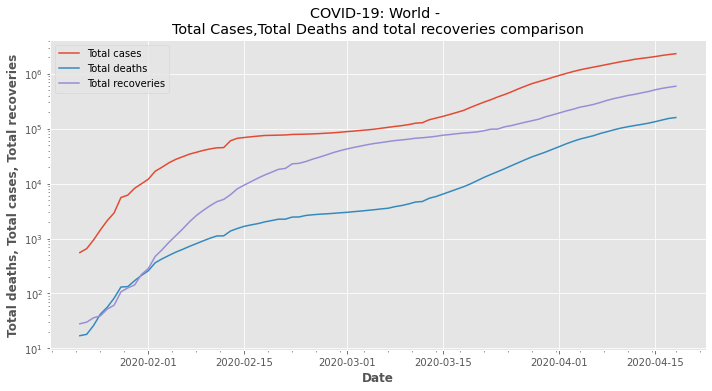

In [53]:
df_confirmed_cases
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(211)
sns.lineplot(df_confirmed_cases["date"],df_confirmed_cases["total cases"],label="Total cases",markers=True)
ax.set_title('COVID-19: World - \nTotal Cases Vs Total Deaths Curve')
ax = f.add_subplot(211)
sns.lineplot(df_death_cases["date"],df_death_cases["total deaths"],label="Total deaths",markers=True)
ax.set_title('COVID-19: World - \nTotal Cases Vs Total Deaths Curve')
ax = f.add_subplot(211)
sns.lineplot(df_recovered_cases["date"],df_recovered_cases["daily recoveries"],label="Total recoveries",markers=True)
ax.set_xlabel('Date',fontweight="bold")
ax.set_ylabel('Total deaths, Total cases, Total recoveries',fontweight="bold")
ax.set_title('COVID-19: World - \nTotal Cases,Total Deaths and total recoveries comparison')
#plt_title = "COVID-19: World - \nCumulative Confirmed Cases Vs Cumulative Deaths Curve"
#plot_params(ax,axis_label,plt_title)
plt.yscale("log")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.minorticks_on()

In [54]:
fig = go.Figure(data=[
    go.Bar(name='total cases', x=df_confirmed_cases['date'], y=df_confirmed_cases['total cases']),
    go.Bar(name='total deaths', x=df_death_cases['date'], y=df_death_cases['total deaths']),
    go.Bar(name='active cases', x=df_active_cases['date'], y=df_active_cases['active cases'])
])


# Change the bar mode
fig.update_layout(barmode='group', title='Fig.3: Total daily Cases,total Deaths & total active cases comparison across the world',showlegend=True)
fig.show()

## Correlation Analysis

### Heat map of correlation of total confirmed cases, recovered cases, deaths and active cases.
##### The correlation coefficient provides us the relationship between two variables. The following table and plot indicates that there is a strong correlation between Total cases, total deaths and active cases w.r.t each other. On the other hand the recovered cases shows less correlation w.r.t to others which means that spread is faster and needs more attention and measurements in order to stop or control the disease. 

In [55]:
covid19.iloc[0:-1,:-1].corr().style.background_gradient(cmap='Reds')

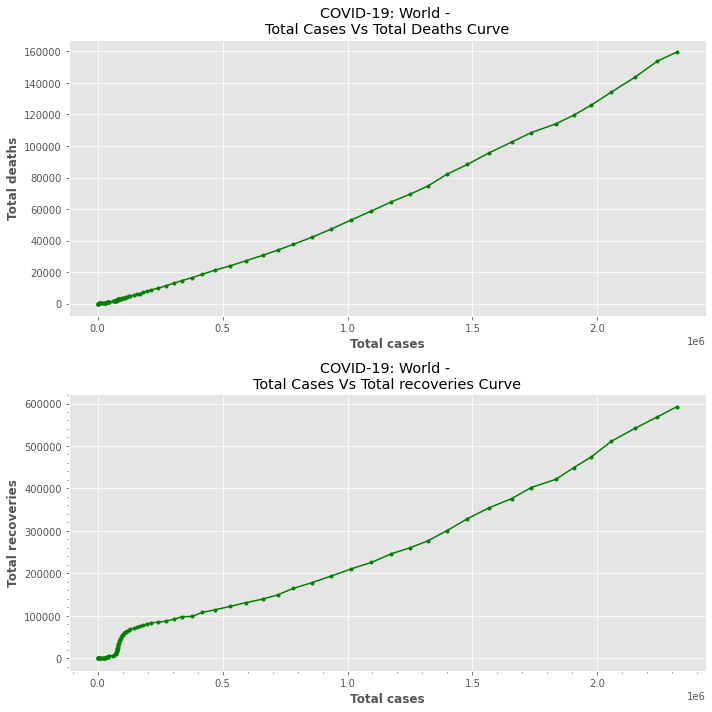

In [56]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(211)
plt.plot(np.sum(np.asarray(df_confirmed.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_deaths.iloc[:,5:]),axis = 0),'g.-')
ax.set_xlabel('Total cases',fontweight="bold")
ax.set_ylabel('Total deaths',fontweight="bold")
ax.set_title('COVID-19: World - \nTotal Cases Vs Total Deaths Curve')
ax = f.add_subplot(212)
plt.plot(np.sum(np.asarray(df_confirmed.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_recovered.iloc[:,5:]),axis = 0),'g.-')
ax.set_xlabel('Total cases',fontweight="bold")
ax.set_ylabel('Total recoveries',fontweight="bold")
ax.set_title('COVID-19: World - \nTotal Cases Vs Total recoveries Curve')
#plot_params(ax,axis_label,plt_title)
#plt.legend()
plt.grid('on')
plt.tight_layout()
plt.minorticks_on()

## Map Visualization
##### Mapping the data is also is key tool tounderstand the situation and to prevent the spread more rapidly. The following geo maps suggests that the disease originally started from China and then gradually spreaded to Europe -> US and now every country is affected by it. It also shows that after China Europe is the hotspot of the disease.

In [57]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['Province/State']))+            
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [58]:
fig = px.choropleth(covid19, locations="Country/Region", 
                    locationmode='country names', color="total_confirmed", 
                    hover_name="total_confirmed", range_color=[1,1000], 
                    color_continuous_scale="peach", 
                    title='Confirmed Cases Worldwide')
# fig.update(layout_coloraxis_showscale=False)
fig.show()
fig = px.choropleth(covid19, locations="Country/Region", 
                    locationmode='country names', color="total_deaths", 
                    hover_name="total_deaths", range_color=[1,1000], 
                    color_continuous_scale="reds", 
                    title='Confirmed deaths Worldwide')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(covid19, locations="Country/Region", 
                    locationmode='country names', color="active_cases", 
                    hover_name="active_cases", range_color=[1,1000], 
                    color_continuous_scale="rainbow", 
                    title='Active cases Worldwide')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(covid19, locations="Country/Region", 
                    locationmode='country names', color="total_recovered", 
                    hover_name="total_recovered", range_color=[1,1000], 
                    color_continuous_scale="solar", 
                    title='total recoveries Worldwide')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(covid19, locations="Country/Region", 
                    locationmode='country names', color="mortality_rate_per_100", 
                    hover_name="mortality_rate_per_100", range_color=[1,10], 
                    color_continuous_scale="icefire", 
                    title='mortality_rate_per_100 Worldwide')
# fig.update(layout_coloraxis_showscale=False)
fig.show()
#df_deaths1

#df_confirmed1

In [59]:
temp2=df_confirmed.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total cases').drop(["Lat","Long","Province/State"],axis=1)#.iloc[231:232,85:95].replace(-1, 1)
#temp2.iloc[231:232,85:95].replace(-1, 1)
temp2.date=pd.to_datetime(temp2.date)

temp2['date'] = temp2['date'].apply(str)

fig = px.scatter_geo(temp2, locations="Country/Region", locationmode='country names', 
                     color="total cases", size=temp2['total cases'].pow(0.3),hover_name="Country/Region", 
                     hover_data=['total cases'],
                     range_color= [0, temp2['total cases'].max()], 
                     projection="natural earth", animation_frame="date", 
                     title='COVID-19:Spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()


### Trend comparison in top 10 countries
#### The following few plots shows the comparison of total cases, number of deaths and number of people getting recovered in top ten most effected countries

In [60]:
fig= px.bar(covid19.head(10),x='Country/Region',y='total_confirmed',color='total_confirmed',title='Daily cases in top 10 countries ')
#plt.savefig('Number of daily cases in top 10 countries.png', dpi=300)
fig.show()

In [61]:
fig = go.Figure(data=[
    go.Bar(name='Total cases', x=covid19['Country/Region'].head(10), y=covid19['total_confirmed'].head(10)),
    go.Bar(name='Total deaths', x=covid19['Country/Region'].head(10), y=covid19['total_deaths'].head(10)),
    go.Bar(name='Total active cases', x=covid19['Country/Region'].head(10), y=covid19['active_cases'].head(10))
])
# fig.update_layout(barmode='overlay', title='Toatal Cases and Death count in top 10 cities of China',showlegend=True)
fig.update_layout(
    title='Comparison between Total cases, Total deaths and active cases in top 10 countries ',
    #xaxis_tickfont_size=14,
    xaxis=dict(
        title='Countries',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Total cases,Total deaths and total active cases',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [62]:
df_confirmed_cases=df_confirmed.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total cases')
df_confirmed_cases.date=pd.to_datetime(df_confirmed_cases.date)
df_country_China=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'China'].groupby(["date"]).sum().reset_index()
#df_country_China
fig= px.bar(df_country_China,x='date',y='total cases',color='total cases',title='Total cases in China ')
fig.show()
df_country_US=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'US'].groupby(["date"]).sum().reset_index()
#df_country_China
fig= px.bar(df_country_US,x='date',y='total cases',color='total cases',title='Total cases in US ')
fig.show()

df_country_Germany=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'Germany'].groupby(["date"]).sum().reset_index()
#df_country_China
fig= px.bar(df_country_Germany,x='date',y='total cases',color='total cases',title='Total cases in Germany')
fig.show()
df_country_Germany=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'Germany'].groupby(["date"]).sum().reset_index()
#df_country_China
fig= px.bar(df_country_Germany,x='date',y='total cases',color='total cases',title='Total cases in Germany')
fig.show()
df_country_Italy=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'Italy'].groupby(["date"]).sum().reset_index()
#df_country_China
fig= px.bar(df_country_Italy,x='date',y='total cases',color='total cases',title='Total cases in Italy')
fig.show()

In [63]:
np.random.seed(sum(map(ord, 'calmap')))

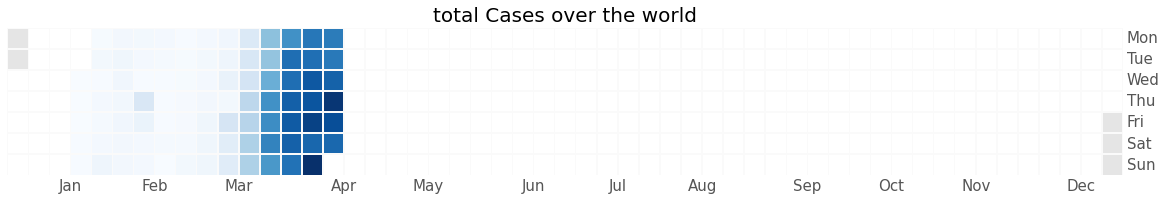

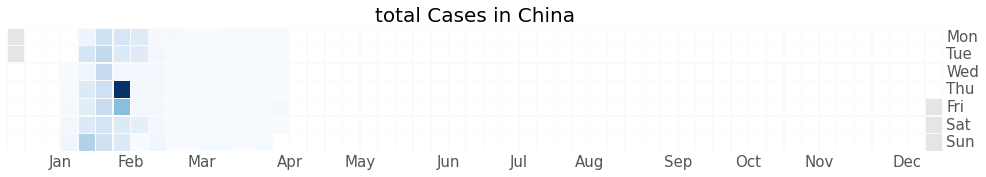

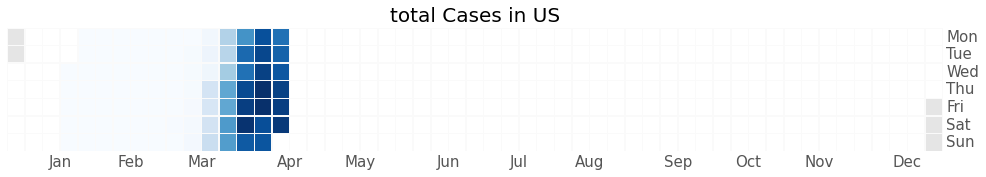

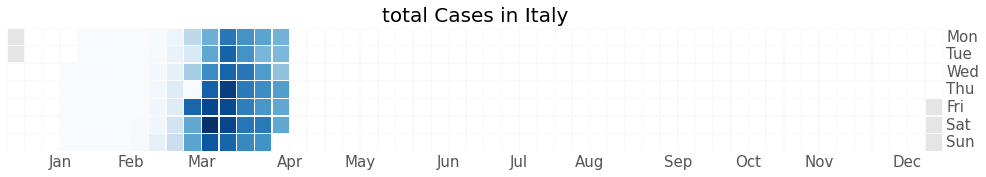

In [64]:
f = plt.figure(figsize=(20,10))
f.add_subplot(1,1,1)
calmap.yearplot(df_confirmed_cases.groupby('date')['total cases'].sum().diff(), fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020,)
plt.title("total Cases over the world",fontsize=20)
plt.tick_params(labelsize=15)

f = plt.figure(figsize=(20,5))
f.add_subplot(2,1,2)
calmap.yearplot(df_country_China.groupby('date')['total cases'].sum().diff(), fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020,)
plt.title("total Cases in China",fontsize=20)
plt.tick_params(labelsize=15)

f = plt.figure(figsize=(20,5))
f.add_subplot(2,1,1)
calmap.yearplot(df_country_US.groupby('date')['total cases'].sum().diff(), fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020,)
plt.title("total Cases in US",fontsize=20)
plt.tick_params(labelsize=15)

f = plt.figure(figsize=(20,5))
f.add_subplot(2,1,2)
calmap.yearplot(df_country_Italy.groupby('date')['total cases'].sum().diff(), fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020,)
plt.title("total Cases in Italy",fontsize=20)
plt.tick_params(labelsize=15)

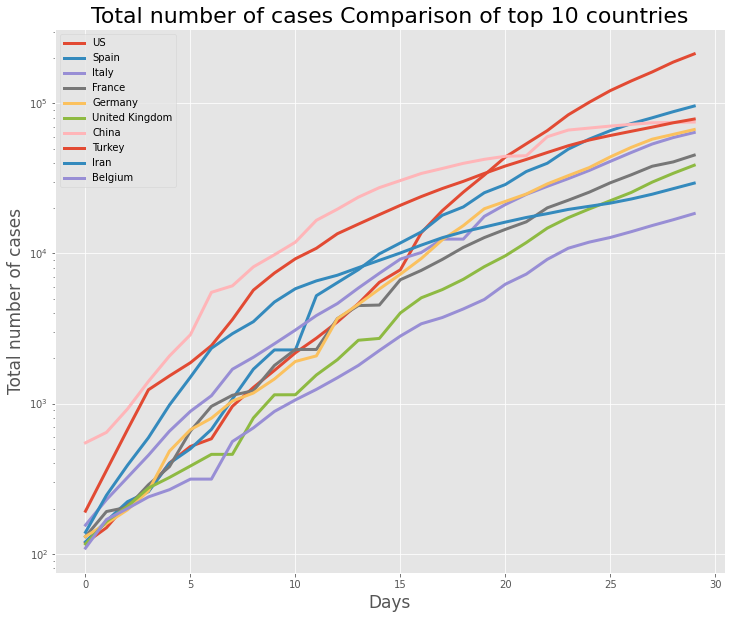

In [127]:
df1 = df_confirmed.groupby('Country/Region').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 100
f = plt.figure(figsize=(12,10))
ax = f.add_subplot(111)
for i,country in enumerate(df1.index):
    if i >= 10:
        break
    days = 30
    t = df1.loc[df1.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    #c= 'g'
    sns.lineplot(xnew,power_smooth,label = country,linewidth =3,data=df1,markersize=10,linestyle='--')
# plot Params
ax.set_xlabel("Days",fontsize=17)
ax.set_ylabel("Total number of cases",fontsize=17)
ax.set_title("Total number of cases Comparison of top 10 countries",fontsize=22)
#ax.annotate()
#plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid('on')
#plt.grid(which='both')
plt.savefig('Number of cases Comparison countries deaths.png')
plt.show()

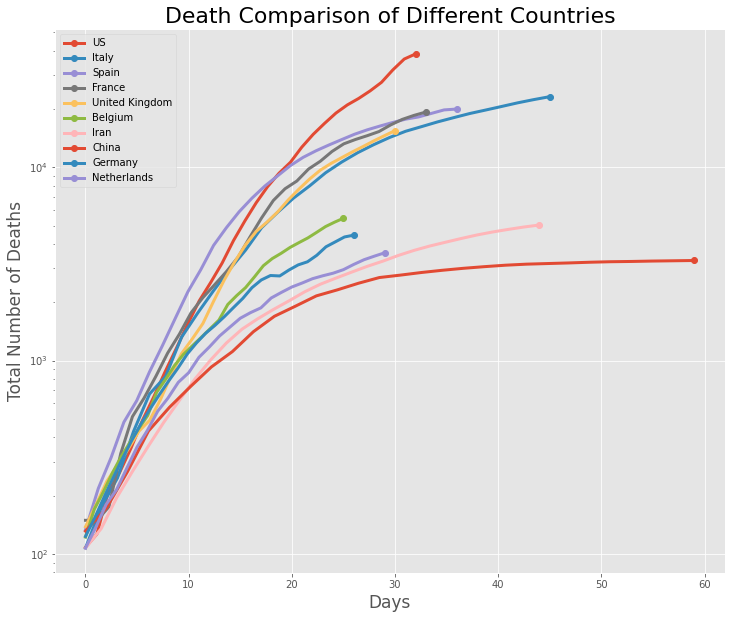

In [128]:
df2 = df_deaths.groupby('Country/Region').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 100
f = plt.figure(figsize=(12,10))
ax = f.add_subplot(111)
for i,country in enumerate(df2.index):
    if i >= 10:
        break
    days = 60
    t = df2.loc[df2.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(),30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
# plot Params
ax.set_xlabel("Days",fontsize=17)
ax.set_ylabel("Total Number of Deaths",fontsize=17)
ax.set_title("Death Comparison of Different Countries",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
#plt.grid(which="both")
plt.grid('on')
plt.savefig('Trend Comparison countries deaths.png')
plt.show()

### Pie Chart Visualization of confirmed cases, deaths and active cases around the world
#### These pie charts demonstrates the percentage spread of the Pandemic accross the world 


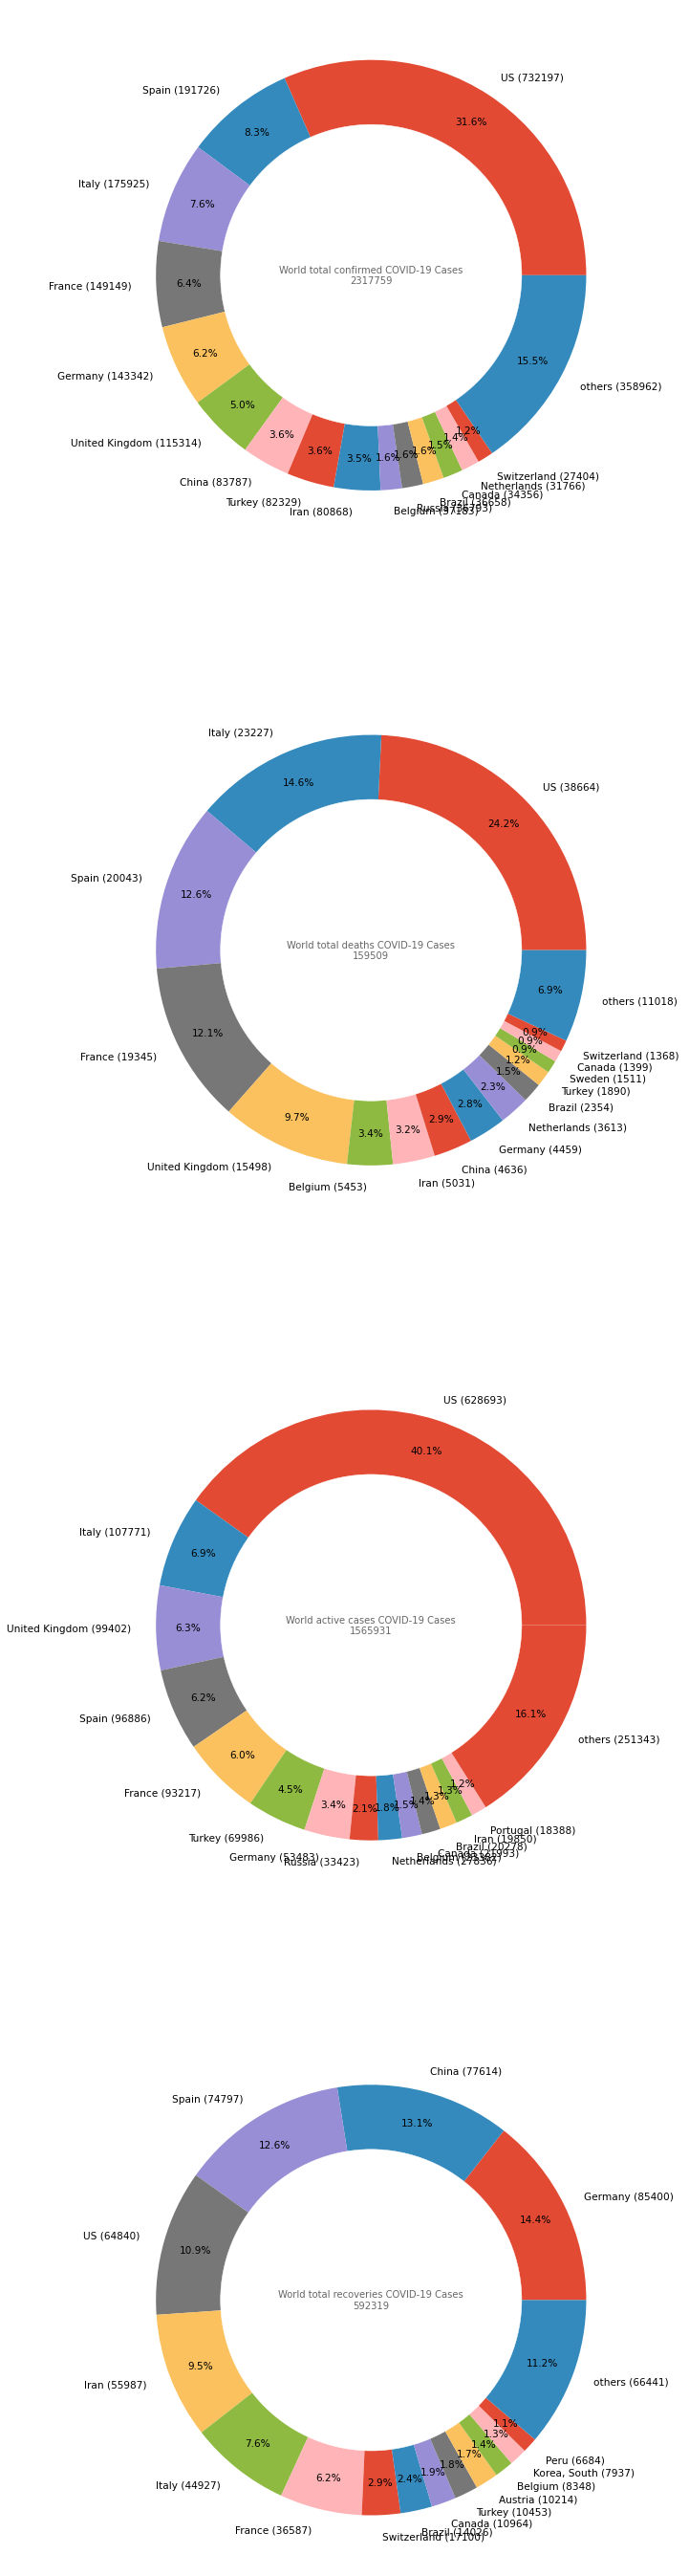

In [129]:
rows = 4
f = plt.figure(figsize=(10,10*rows))

stats = [covid19.drop("Total",axis=0).loc[:,['Country/Region','total_confirmed']],covid19.drop("Total",axis=0).loc[:,['Country/Region','total_deaths']],covid19.drop("Total",axis=0).loc[:,['Country/Region','active_cases']],covid19.drop("Total",axis=0).loc[:,['Country/Region','total_recovered']]]
label = ["total confirmed","total deaths","active cases","total recoveries"]
threshold = [25000,1000,15000,5000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["Country/Region"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=10, alpha = 0.6)
#print(df_countries)
plt.savefig('Pie visualization world.png')
plt.show()

In [68]:
df_death_cases=df_deaths.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total deaths')
df_death_cases.date=pd.to_datetime(df_death_cases.date)
df_death_China=df_death_cases.loc[df_death_cases['Country/Region'] == 'China'].groupby(["date"]).sum().reset_index()
df_confirmed_cases=df_confirmed.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total cases')
df_confirmed_cases.date=pd.to_datetime(df_confirmed_cases.date)
df_china_cases=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'China'].groupby(["date"]).sum().reset_index()
# df_death_China
# df_china_cases

### Covid19 in China

In [69]:
fig = go.Figure(data=[
    go.Bar(name='total cases', x=df_china_cases['date'], y=df_china_cases['total cases']),
    go.Bar(name='total deaths', x=df_death_China['date'], y=df_death_China['total deaths'])
])


# Change the bar mode
fig.update_layout(barmode='group', title='Comparison b/w total Cases and total Deaths in China',showlegend=True)
fig.show()

### Spread progress in China's provinces
#### In this analysis it can be clearly seen that the Hubai Province of China was most affected in the list since the disease initially originated from Wuhan city of Hubie province causing 68K+ people infected and more than 4500 deaths.

In [70]:
df_china_cases=df_confirmed_cases.loc[df_confirmed_cases['Country/Region'] == 'China'].groupby(["Province/State"])\
                    .max().sort_values('total cases',ascending=False).reset_index()\
                    .drop(["Lat","Long"],axis=1)

df_death_cases=df_deaths.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='total deaths')
df_death_cases.date=pd.to_datetime(df_death_cases.date)
df_china_deaths=df_death_cases.loc[df_death_cases['Country/Region'] == 'China'].groupby(["Province/State"])\
                     .max().sort_values('total deaths',ascending=False).reset_index()\
                     .drop(["Lat","Long"],axis=1)

In [71]:
fig = go.Figure(data=[
    go.Bar(name='Cases', x=df_china_cases['Province/State'].head(5), y=df_china_cases['total cases'].head(5)),
    go.Bar(name='Deaths', x=df_china_deaths['Province/State'].head(5), y=df_china_deaths['total deaths'].head(5))
])
fig.update_layout(barmode='group', title='Total Cases and Death comparison in top 10 Provinces of China',showlegend=True,
                     xaxis=dict(
        title='Provinces of China',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Total number of cases and Total deaths',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

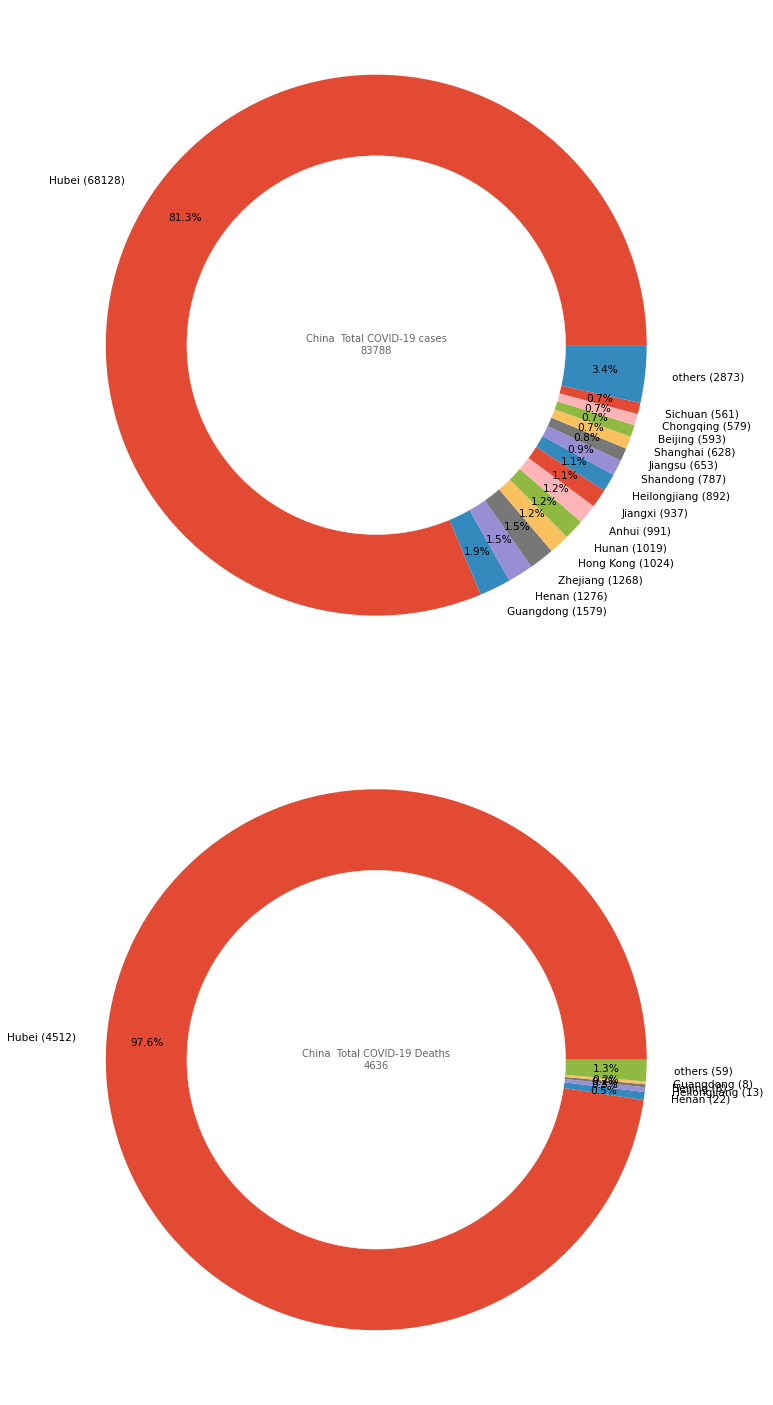

In [130]:
rows = 2
f = plt.figure(figsize=(10,10*rows))

stats = [df_china_cases.loc[:,["Province/State",'total cases']],df_china_deaths.loc[:,["Province/State",'total deaths']]]
label = ["cases","Deaths"]
threshold = [500,7]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_states = stat.groupby(["Province/State"]).sum()
    df_states = df_states.sort_values(df_states.columns[-1],ascending= False)
    others = df_states[df_states[df_states.columns[-1]] < threshold[i] ].sum()[-1]
    df_states = df_states[df_states[df_states.columns[-1]] > threshold[i]]
    df_states = df_states[df_states.columns[-1]]
    df_states["others"] = others
    labels = [df_states.index[i] +" (" + str(int(df_states[i])) +") "for i in range(df_states.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_states, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"China "+ " Total COVID-19" + " "+ label[i] +"\n" +str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=10, alpha = 0.6)
#print(df_countries)
plt.savefig('china pie visualization.png')
plt.show()

## Forecasting

### Global Trend
#### In order to prevent the spread and to develope a strategy, it is very important to follow the pattern and build a model to predict the future trend and impact based on the previously availabale data. The following two models predict the trend of number of cases and deaths for next one month.
**Note:** This model is based on the the current data and no other factor is included. Therefore the trend can be vary over time depending on the actions taken by each individual country around the glob. 

In [73]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [74]:
#df = pd.read_csv(r'C:\Users\alias\Desktop\covid 19 analzsis\COVID-19-master2\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv',parse_dates=True)
df_total_cases=df_confirmed.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='confirmed cases')\
    .drop(["Province/State","Lat","Long"],axis=1)\
    .groupby('date').sum()['confirmed cases'].reset_index()
#df_total_cases=df_total_cases.rename(columns={'confirmed cases':'confirmed'})
df_total_cases.columns=['ds','y']
df_total_cases['ds']=pd.to_datetime(df_total_cases['ds'])
#df_total_cases.tail()


In [78]:
m=Prophet(interval_width=0.95)
m.fit(df_total_cases)
future=m.make_future_dataframe(periods=30)
#future

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Total daily cases prediction in world')

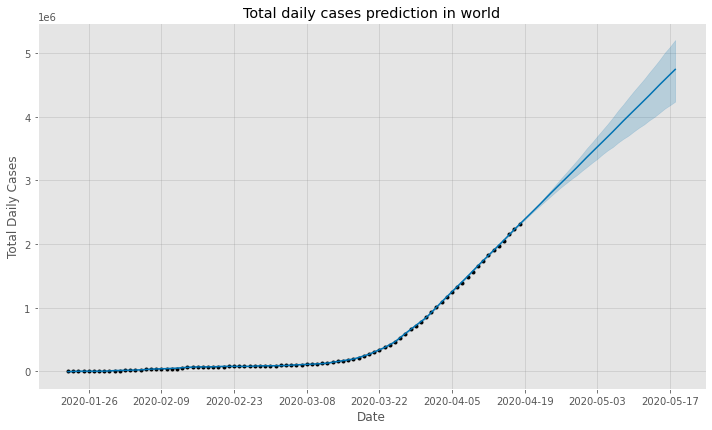

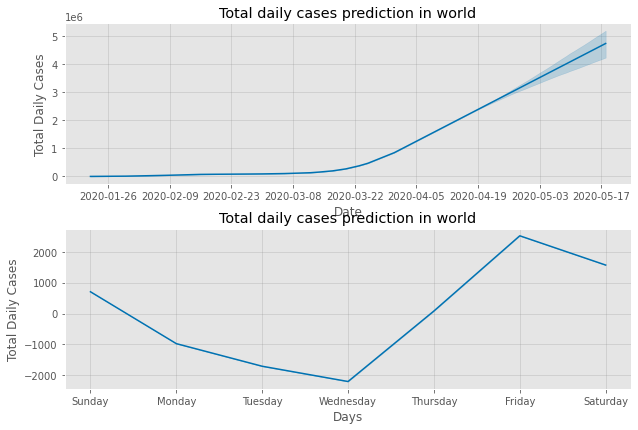

In [79]:
forecast=m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_plot=m.plot(forecast)
forecast_plot2=m.plot_components(forecast)
axes = forecast_plot.get_axes()
axes2 = forecast_plot2.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Daily Cases')
axes[0].set_title('Total daily cases prediction in world')
axes2[0].set_xlabel('Date')
axes2[0].set_ylabel('Total Daily Cases')
axes2[0].set_title('Total daily cases prediction in world')
axes2[1].set_xlabel('Days')
axes2[1].set_ylabel('Total Daily Cases')
axes2[1].set_title('Total daily cases prediction in world')


In [29]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

In [80]:
#df2 = pd.read_csv(r'C:\Users\alias\Desktop\covid 19 analzsis\COVID-19-master2\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv',parse_dates=True)
df_total_deaths=df_deaths.melt(id_vars=('Country/Region','Province/State','Lat','Long'),var_name='date',value_name='confirmed deaths').drop(["Province/State","Lat","Long"],axis=1)
df_total_deaths=df_total_deaths.groupby('date').sum()['confirmed deaths'].reset_index()
#df_total_cases=df_total_cases.rename(columns={'confirmed cases':'confirmed'})
df_total_deaths.columns=['ds','y']
df_total_deaths['ds']=pd.to_datetime(df_total_deaths['ds'])
#df_total_deaths.tail()

In [81]:
n=Prophet(interval_width=0.95)
n.fit(df_total_deaths)
future=n.make_future_dataframe(periods=30)
#future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Total daily Deaths prediction in world')

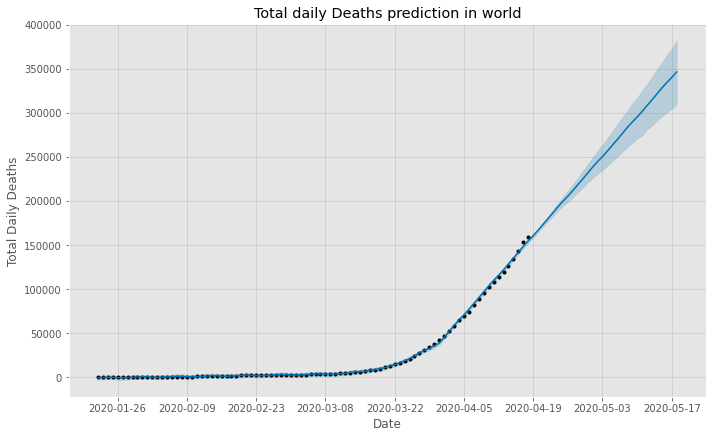

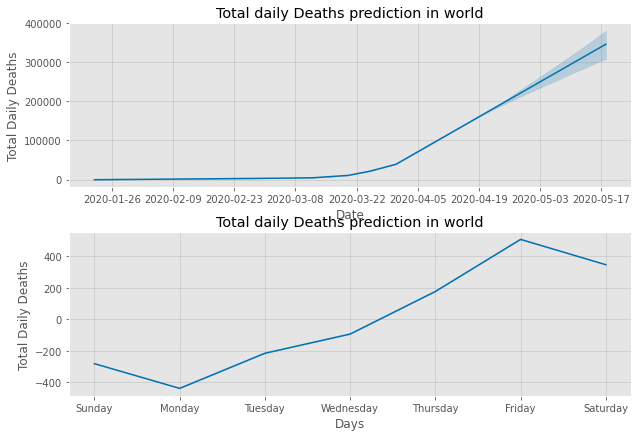

In [82]:
forecast_deaths=n.predict(future)
forecast_deaths[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_plot=n.plot(forecast_deaths)
forecast_plot2=n.plot_components(forecast_deaths)
axes = forecast_plot.get_axes()
axes2 = forecast_plot2.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Daily Deaths')
axes[0].set_title('Total daily Deaths prediction in world')
axes2[0].set_xlabel('Date')
axes2[0].set_ylabel('Total Daily Deaths')
axes2[0].set_title('Total daily Deaths prediction in world')
axes2[1].set_xlabel('Days')
axes2[1].set_ylabel('Total Daily Deaths')
axes2[1].set_title('Total daily Deaths prediction in world')
# axes2[1].set_yscale("log")
# axes[0].set_yscale("log")
# axes2[0].set_yscale("log")

### Treemap
#### In order to conclude, I have summarized the results into a tree map indicating total number of cases, deaths, recoveries,active cases and mortality rate of the top ten countries,respectively. 

In [39]:
#conda install -c conda-forge pycairo

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [36]:
import squarify
from vega_datasets import data as vds
import pygal
import cairo

In [123]:
covid=covid19.rename(columns={'Country/Region':'Country'}).iloc[0:-1,].head(9)
#covid

(0.0, 100.0, 0.0, 100.0)

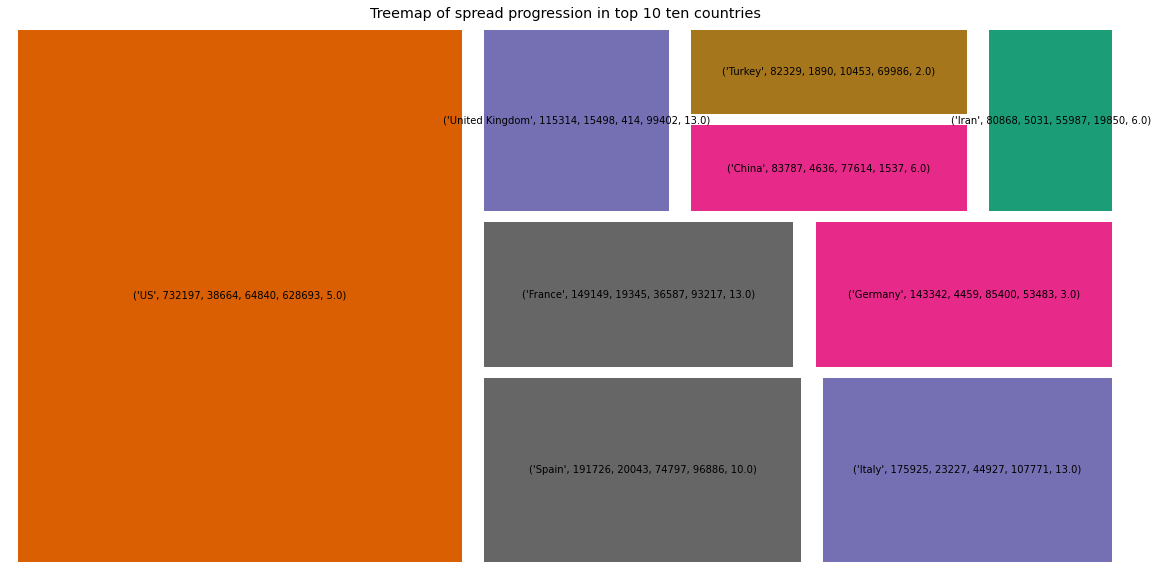

In [131]:
sizes = covid.total_confirmed.to_list()
np.random.seed(seed=123456)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(covid.Country, covid.total_confirmed,covid.total_deaths,\
                 covid.total_recovered,covid.active_cases,covid.mortality_rate_per_100))

# treemap plot
plt.figure(figsize=(20,10))
squarify.plot(sizes=sizes, 
              color=color, 
              label=label, 
              pad=True)

# labels
plt.title('Treemap of spread progression in top 10 ten countries')
plt.savefig('Tree map.png')
plt.axis('off')

**Final Note:** 
* Your feedback will always be appereciated 
* Comment below if you have any questions or find some error or need some improvements in this not book